In [1]:
import torch

In [2]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla K80


#Generate data

In [33]:
import random
lstX = []
lstY = []
for x in range(-5000, 5000, 250):
  lstX.append([x])
  y = 3*x*x*x + 2*x*x + 5*x + random.uniform(0, 1)*500
  lstY.append([y])

In [34]:
import numpy as np
numpyX = np.array(lstX)
numpyY = np.array(lstY)
print(numpyX.shape, numpyY.shape)

(40, 1) (40, 1)


In [35]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY_hat, testY_hat = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
print(trainX.shape, testX.shape, trainY_hat.shape, testY_hat.shape)

(32, 1) (8, 1) (32, 1) (8, 1)


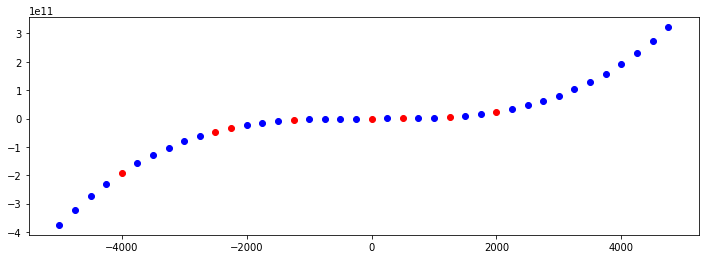

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.scatter(trainX, trainY_hat, color = "blue")
plt.scatter(testX, testY_hat, color = "red")
plt.show()

# Build NN

In [37]:
import torch.nn as nn

In [38]:
MyNet = nn.Sequential(
    nn.Linear(1, 30),
    nn.ReLU(),
    nn.Linear(30, 15),
    nn.ReLU(),
    nn.Linear(15, 1),
)
MyNet.to(device)
print(MyNet)

Sequential(
  (0): Linear(in_features=1, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=1, bias=True)
)


In [39]:
from torchsummary import summary
summary(MyNet, input_size=(32, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 32, 30]              60
              ReLU-2               [-1, 32, 30]               0
            Linear-3               [-1, 32, 15]             465
              ReLU-4               [-1, 32, 15]               0
            Linear-5                [-1, 32, 1]              16
Total params: 541
Trainable params: 541
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.00
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [40]:
loss_func = torch.nn.MSELoss()

In [41]:
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.005)

# Train N epoches

In [42]:
tensorX = torch.FloatTensor(trainX).to(device)
tensorY_hat = torch.FloatTensor(trainY_hat).to(device)

In [43]:
lossLst = []
for epoch in range(1, 5000):
    tensorY = MyNet(tensorX)
    loss = loss_func(tensorY_hat, tensorY)
    loss1 = float(loss)
    lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

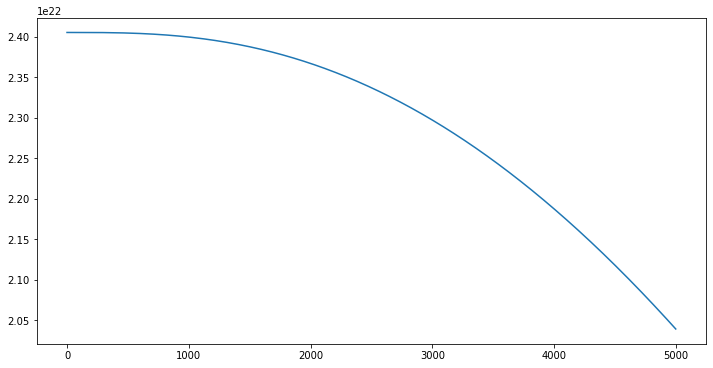

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(lossLst)
plt.show()

##Training data performance

In [45]:
tensorY = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("%.2f" % (float(loss)))

20390695831266261991424.00


In [46]:
trainY = tensorY.detach().cpu().numpy()

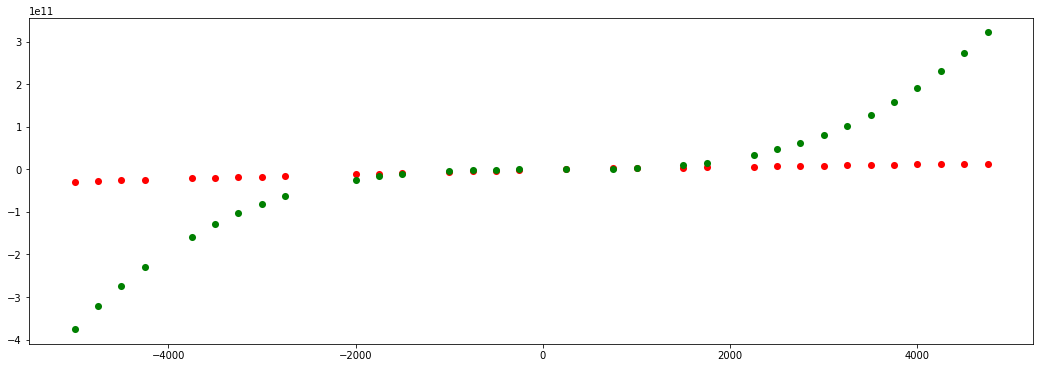

In [47]:
plt.figure(figsize=(18, 6))
plt.scatter(trainX, trainY, s=50, lw=0, color="red")
plt.scatter(trainX, trainY_hat, s=50, lw=0, color="green")
plt.show()